# IT Customer Churn Prediction with Imbalanced Data

**Overview of Problem Statement:**

Predicting customer churn is a critical business objective for IT companies as it is significantly more cost-effective to retain existing customers than to acquire new ones. This project aims to develop a predictive model to identify customers who are likely to churn, enabling the company to implement targeted retention strategies. A key challenge in this task is the imbalanced nature of churn data, where the number of churning customers is typically much smaller than non-churning customers. Addressing this data imbalance is crucial for building an accurate and reliable churn prediction model.

## Key Project Points:

*   **Objective:** Predict customer churn to inform retention strategies.
*   **Challenge:** Handling imbalanced dataset (fewer churn examples).
*   **Data:** Utilize provided customer data including services, account info, and demographics.
*   **Methodology:** Explore techniques for handling imbalanced data (e.g., resampling, different evaluation metrics) and build a predictive model.
*   **Impact:** Enable targeted interventions to reduce customer churn and increase retention.

## Objective:

To develop an accurate and reliable predictive model for IT customer churn, specifically addressing the challenges posed by imbalanced data, in order to support targeted customer retention strategies.

## Data Description:

*   **Source:** [Specify the source of data, e.g., Kaggle, internal database]
*   **Features:**
    *   Churn (Target Variable)
    *   Services (phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies)
    *   Account Information (tenure, contract, payment method, paperless billing, monthly charges, total charges)
    *   Demographics (gender, age range, partners, dependents)

## Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('IT_Customer_Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Data Preprocessing - Data Cleaning

In [ ]:
df.rename(columns={
    'gender':'Gender',
    'SeniorCitizen':'SeniorCitizen',
    'Partner':'Partner',
    'Dependents':'Dependents',
    'tenure':'Tenure',
    'PhoneService':'PhoneService',
    'MultipleLines':'MultipleLines',
    'InternetService':'InternetService',
    'OnlineSecurity':'OnlineSecurity',
    'OnlineBackup':'OnlineBackup',
    'DeviceProtection':'DeviceProtection',
    'TechSupport':'TechSupport',
    'StreamingTV':'StreamingTV',
    'StreamingMovies':'StreamingMovies',
    'Contract':'Contract',
    'PaperlessBilling':'PaperlessBilling',
    'PaymentMethod':'PaymentMethod',
    'MonthlyCharges':'MonthlyCharges',
    'TotalCharges':'TotalCharges',
    'Churn':'Churn'}, inplace=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Outlier Detection

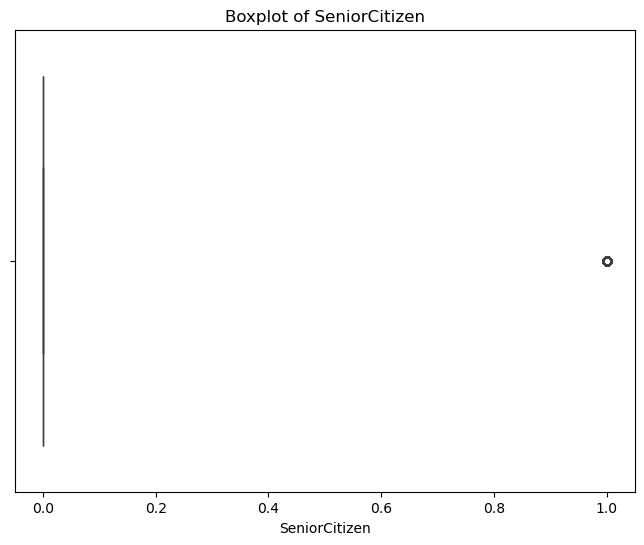

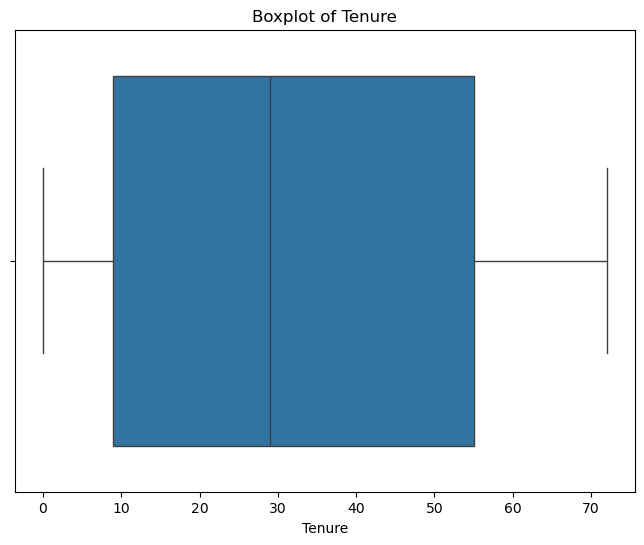

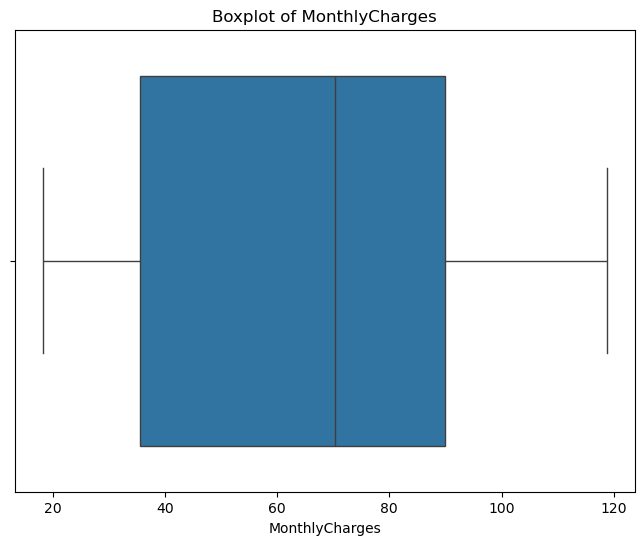

In [ ]:
# outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

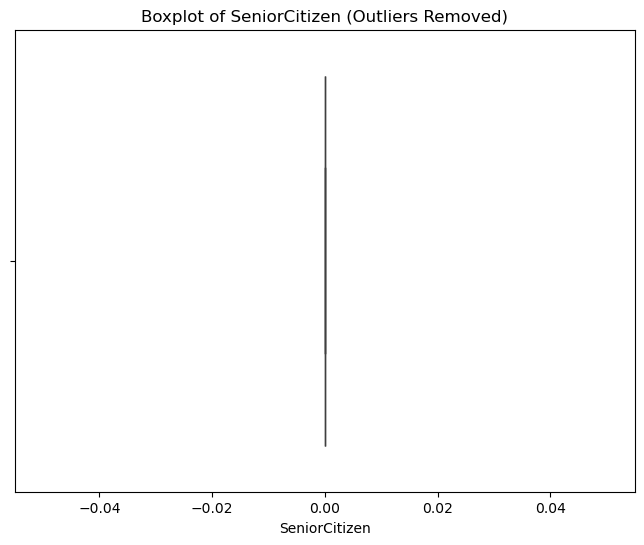

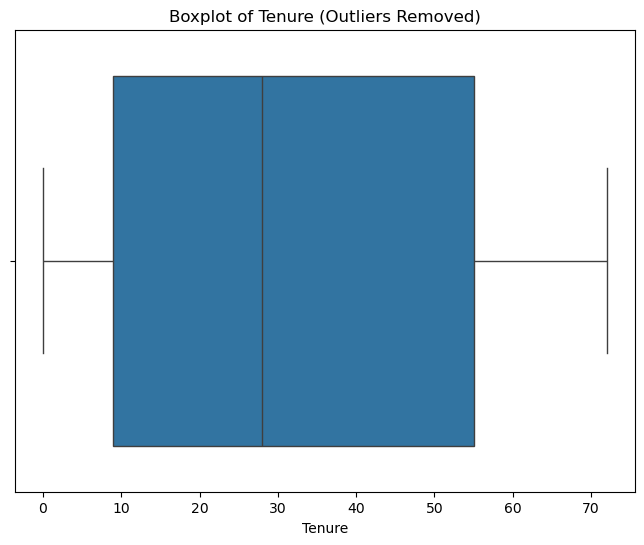

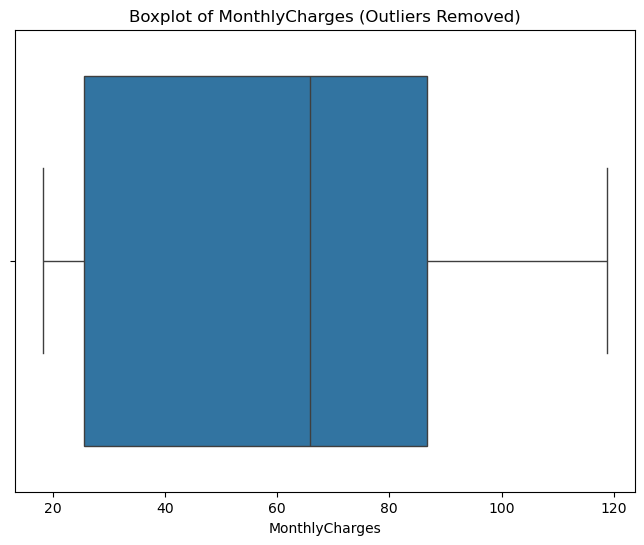

In [ ]:
# IQR for outlier removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate through numerical features and remove outliers
numerical_features = df.select_dtypes(include=['number']).columns
df_filtered = df.copy() # Create a copy to avoid modifying the original df in place within the loop

for col in numerical_features:
    df_filtered = remove_outliers_iqr(df_filtered, col) # Apply outlier removal to the copied dataframe

# Verify outlier removal by plotting boxplots again
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_filtered[col])  # Use the filtered DataFrame
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()

df = df_filtered # Update the original dataframe with the filtered version